In [1]:
from core.data.models import Models
from core.data.models_dict_v2 import model_dict
from core.data.generate_synthetic_df import generate_synthetic_df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

#### Recurrence equation 


$CLV(s,t) = \sum_{s'}^{S} P(s'|s)[Profit(s',t) + \gamma  CLV_0(s',t)]\quad t=1,\dots, T; s=1,\dots, k$


- $P(s'|s)$: Transition matrix (simulation)

- $Profit(s',t)$

- $CLV_0(s',t)$: Initial value (random)

- $\gamma = 0.5$

In [2]:
# Create synthetic dataframe over time
def data_over_time(n=100, k=8):
    seed = np.random.randint(1000)
    df = generate_synthetic_df(n, seed)
    # Instantiate an object from the class "Models"
    models = Models(model_dict)
    # Calculate the cost and price
    cost = models.calculate_cost(df)
    pricing = models.calculate_pricing(df)
    # Calculate the profit on the synthetic dataframe
    df["profit"] = models.calculate_profit(cost, pricing)
    df["class"] = list(np.random.randint(k, size=n)+1)
    return(df)

In [3]:
T = 1000
n=100
k=8
PROFIT = np.zeros([T,n])
STATES = np.zeros([T,n])
for i in range(T):
    DATA = data_over_time(n=100, k=8)
    PROFIT[i,:] = DATA["profit"]
    STATES[i,:] = DATA["class"]

In [4]:
DATA

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,class
0,7177,45,0,26068,False,False,Not_Single,0,1,-30.702137,6
1,6997,65,10,29819,False,False,Not_Single,1,0,54.012949,7
2,5012,66,13,22897,False,False,Single,0,0,65.125771,1
3,32326,54,8,11889,True,True,Single,0,0,17.867557,1
4,1747,22,18,31370,True,False,Not_Single,0,0,-1.742601,4
...,...,...,...,...,...,...,...,...,...,...,...
95,2036,38,0,24396,False,False,Not_Single,1,0,-76.832732,5
96,6713,16,10,48760,False,False,Single,1,0,-202.480837,2
97,0,46,11,19294,False,False,Not_Single,0,0,22.893243,2
98,15767,73,6,12008,False,False,Not_Single,1,0,79.977576,8


In [5]:
profit = pd.DataFrame(PROFIT)
states = pd.DataFrame(STATES)

$Profit(t,n)$

In [6]:
profit

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,50.101494,-55.616518,-183.075783,-71.576850,22.313472,88.109694,-55.008662,-34.865619,95.629038,33.369436,...,57.582087,14.599386,-10.227195,-54.486034,14.006594,-25.303768,24.463931,58.188017,47.543768,47.688466
1,84.546922,-46.390104,-134.994556,-3.676748,6.151560,-71.512956,150.060362,-135.820787,-67.628020,62.558784,...,-82.421461,-9.966636,38.266342,79.079900,129.674661,42.810669,31.825199,-14.368589,-53.784273,27.091843
2,2.896418,11.311075,-44.330787,-26.960675,79.064062,38.702692,45.634989,27.761083,48.696235,29.700276,...,-17.879449,-14.716049,-24.965818,9.151480,-17.085561,57.571845,-98.798135,-14.878076,70.681428,34.872548
3,80.165129,-65.278553,-14.318372,-4.791503,16.900717,-129.146878,64.592366,-123.854634,-64.661088,-94.434999,...,10.367991,-13.149813,39.301008,-35.577045,-16.664831,8.490792,43.173264,-53.435572,-90.923264,126.178551
4,40.014248,-98.649892,29.965829,-5.061085,-1.079150,-84.885457,46.681417,-115.731118,-31.064002,-165.361586,...,66.659740,64.698412,-155.793629,-8.026440,-23.074887,-92.203787,-25.371600,-140.862443,34.284417,49.840581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.130398,-9.139628,3.685078,-83.876608,25.358671,16.916182,140.680763,-109.871781,39.680834,-35.600722,...,17.668614,-34.887786,-45.327601,3.997500,-1.063287,22.822117,25.032287,95.648167,69.493599,20.099229
996,-82.932683,52.982749,32.675474,-149.275661,33.882164,-17.464523,83.966494,31.726495,102.198781,-59.718904,...,18.068642,-137.244903,79.779962,-112.579967,-83.284115,123.789051,2.009758,47.827672,58.239747,11.188874
997,67.503633,40.266940,21.433987,149.669102,55.546745,47.432753,22.263565,-87.998036,36.721767,119.824068,...,-184.421439,105.405223,-110.116719,55.616439,32.153096,-131.093162,18.838478,-20.885612,49.494996,-102.062607
998,80.207820,-1.231477,0.433010,-10.943900,11.898302,1.106446,-35.618929,-5.075963,19.379216,-42.130984,...,68.070678,107.748952,-22.780038,41.820011,55.422623,3.668692,23.365748,-34.469908,-63.118228,25.816802


#### Assuming random states, but it can be improved by the solution of Problem 1, the methodology is agnostic the clustering/classification model.

In [7]:
states = states.astype('int')
states

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,2,7,5,2,1,1,4,1,...,5,8,3,7,6,4,1,5,3,8
1,3,8,2,8,7,6,8,5,3,3,...,2,8,7,6,7,7,2,3,3,1
2,4,3,4,2,6,1,1,2,2,8,...,6,2,4,7,3,7,7,7,2,8
3,8,2,4,7,6,2,1,8,4,4,...,8,8,4,3,5,8,2,3,1,5
4,4,5,7,3,3,8,2,4,6,1,...,3,6,1,3,8,3,5,3,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,4,3,5,2,6,7,7,5,1,...,2,2,6,1,3,1,4,1,8,8
996,3,8,1,5,4,5,1,8,3,7,...,1,1,2,5,5,6,6,6,2,7
997,1,2,8,2,4,7,2,4,6,5,...,2,7,5,2,1,8,6,6,3,2
998,8,6,3,8,6,8,2,5,7,1,...,3,2,3,6,3,4,6,4,7,6


In [8]:
state_current = states.iloc[:-1,:]
state_next = states.iloc[1:,:]
STATE_CURRENT = state_current.values.ravel()
STATE_NEXT = state_next.values.ravel()
P = matrix = pd.crosstab(
    pd.Series(STATE_CURRENT, name='from'),
    pd.Series(STATE_NEXT, name='to'),
    normalize=0)

In [9]:
P

to,1,2,3,4,5,6,7,8
from,,,,,,,,
1,0.104307,0.174831,0.118750,0.091132,0.134628,0.116216,0.105997,0.154139
2,0.133129,0.124368,0.136477,0.109552,0.115179,0.113398,0.142104,0.125792
3,0.120219,0.112445,0.169938,0.136073,0.136304,0.106519,0.114369,0.104133
4,0.120293,0.124664,0.148874,0.105161,0.131052,0.118023,0.133826,0.118107
5,0.120997,0.153997,0.117086,0.105924,0.104864,0.129553,0.125805,0.141775
6,0.112922,0.158601,0.125998,0.137120,0.106300,0.130837,0.108847,0.119375
7,0.121861,0.136382,0.107180,0.122984,0.114721,0.123546,0.141837,0.131488
8,0.111921,0.144341,0.113903,0.143706,0.139743,0.107483,0.121354,0.117549


In [10]:
PROFIT = np.zeros([T,k])
for i in range(T):
    PROFIT[i,0] = profit.loc[i,states.iloc[i,:]==1].mean()
    PROFIT[i,1] = profit.loc[i,states.iloc[i,:]==2].mean()
    PROFIT[i,2] = profit.loc[i,states.iloc[i,:]==3].mean()
    PROFIT[i,3] = profit.loc[i,states.iloc[i,:]==4].mean()
    PROFIT[i,4] = profit.loc[i,states.iloc[i,:]==5].mean()
    PROFIT[i,5] = profit.loc[i,states.iloc[i,:]==6].mean()
    PROFIT[i,6] = profit.loc[i,states.iloc[i,:]==7].mean()
    PROFIT[i,7] = profit.loc[i,states.iloc[i,:]==8].mean()
PROFIT = pd.DataFrame(PROFIT)

In [11]:
PROFIT

,0,1,2,3,4,5,6,7
0,-14.541247,-4.759059,-22.756604,-2.268450,26.165826,-12.142923,-0.471715,9.653080
1,7.021382,-10.909444,2.771574,-11.069855,-9.957780,18.369654,8.815964,22.418374
2,18.295013,8.480854,-15.745679,10.467320,26.983614,-15.026634,6.573700,22.495354
3,33.652860,-7.270006,-1.660186,-1.785294,27.051085,2.446404,4.057020,-9.608260
4,-16.750419,-27.605999,-12.910154,26.727174,-3.460448,8.658660,17.888776,8.771313
...,...,...,...,...,...,...,...,...
995,2.859211,7.573958,6.314872,0.659555,-27.632532,-27.761655,18.730020,7.285321
996,-3.354077,6.519583,7.354647,-29.756392,-54.873205,26.611404,-33.092336,40.276290
997,22.805451,19.606391,-3.442643,-3.570051,30.257049,-2.960752,-13.169958,-2.706983
998,13.127032,-6.051459,19.671981,12.414048,-25.228542,1.921718,13.001623,7.283918


#### Initial value condition of $CLV_0 = 0$

In [12]:
CLV_0 = pd.DataFrame(np.zeros([T,k]))

In [13]:
CLV_0

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
gamma = 0.85

$CLV(s,t) = \sum_{s'}^{S}  P(s'|s)[Profit(s',t) + \gamma CLV(s',t)]$

In [15]:
CLV = pd.DataFrame(P.values@(PROFIT.T.values+gamma*CLV_0.T.values)).T

<AxesSubplot:>

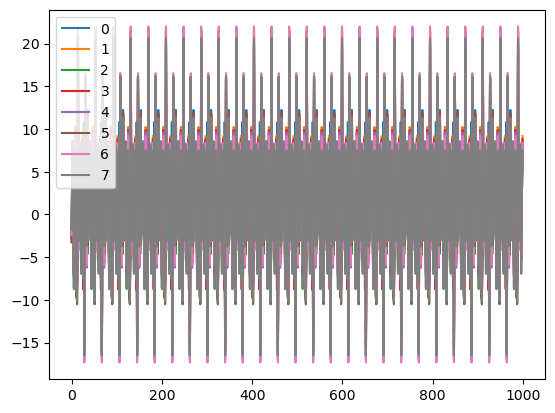

In [16]:
CLV.plot()

In [17]:
MAE = mae(CLV,CLV_0)
print(MAE)

5.764494180407921


In [18]:
error = 0.001
kk = 0
while(MAE>error):
    print(kk)
    CLV_0 = CLV
    CLV = pd.DataFrame(gamma*P.values@(PROFIT.T.values+CLV_0.T.values)).T
    MAE = mae(CLV,CLV_0)
    kk+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


<AxesSubplot:>

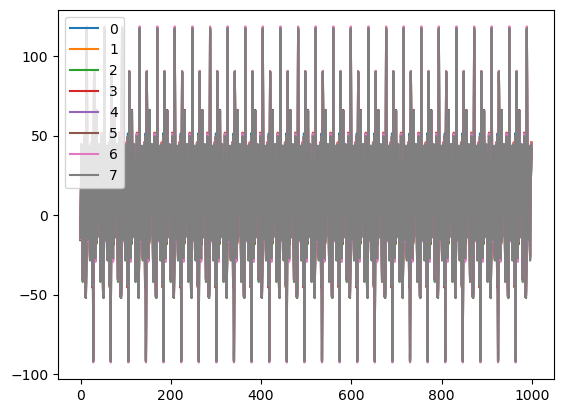

In [19]:
CLV.plot()

### **Observation**: The dynamic is artficial

- Depends on the initial distribution of CLV, 

- The realization sequences of the profits: may be more meaningful with real data

- and the syntetic transition matrix